In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("./data/features2_all.csv")
X = data[data.columns[:-1]]
y = data['y']

In [9]:
# split train test first
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y)

29651    1
30436    1
30161    1
36831    1
13269    1
        ..
17035    1
39541    1
20495    1
30977    1
24088    1
Name: y, Length: 3480, dtype: int64

In [5]:
# balance train dataset
from Python.sklearn.data_split import *
X_bal, y_bal = balance_sample(X_train, y_train)
X_bal.shape

(54822, 27)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_bal, y_bal)

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [20]:
from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_pred))
print(f1_score(y_valid, y_valid_pred))

0.8888237019653857
0.8917141604559403


In [22]:
from sklearn.metrics import confusion_matrix

confmt = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred)
print(confmt)

[[9033  104]
 [ 143 1017]]


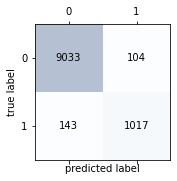

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 8, 10],
    'n_estimators': [50, 100, 150],
    'min_samples_leaf': [1, 3, 5],
    "max_features": [5,10,15]
}]

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted')

gs.fit(X_train, y_train)
print(gs.best_score_)

In [19]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
test_data= pd.read_csv("./data/feature_2_test.csv")
test_data = test_data[test_data.columns[:-1]]
test_y = model.predict(test_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 1])

In [29]:
result = pd.concat([test_data['id'], pd.DataFrame(test_y)], axis=1)
result.to_csv("./data/2_result.csv", index=False)